<a href="https://colab.research.google.com/github/rgurve/Using-FASTAI-for-classification-of-Shoulder-conditions/blob/main/Shoulder_MRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/rgurve/Using-FASTAI-for-classification-of-Shoulder-conditions.git

Cloning into 'Using-FASTAI-for-classification-of-Shoulder-conditions'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 10 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), done.


In [ ]:
!unzip '/content/Using-FASTAI-for-classification-of-Shoulder-conditions/Shoulder MRI.zip'

In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from fastai.vision import *
from fastai.metrics import accuracy

In [6]:
PATH = '/content/Shoulder MRI'

In [7]:
np.random.seed(24)
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(PATH, valid_pct=0.2, ds_tfms=tfms, size=299, bs=16).normalize(imagenet_stats)


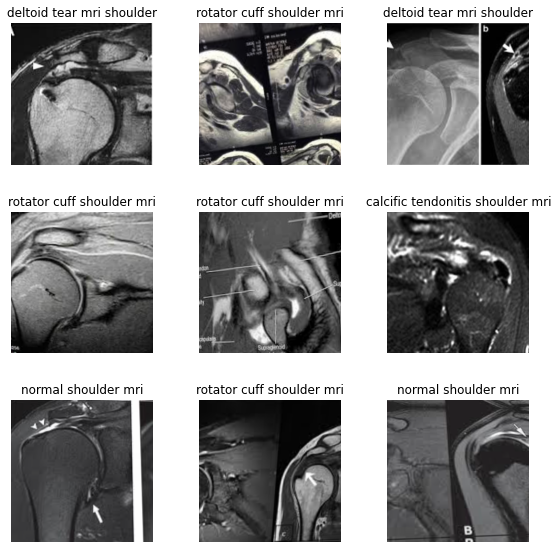

In [8]:
data.show_batch(rows=3, figsize=(8,8))

In [9]:
learn = cnn_learner(data, models.resnet101, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/hub/checkpoints/resnet101-5d3b4d8f.pth


In [10]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,2.410175,2.927616,0.272727,00:06
1,2.330891,3.860183,0.303030,00:04
2,2.040607,3.559476,0.242424,00:04
3,1.825670,3.174263,0.272727,00:04


In [11]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


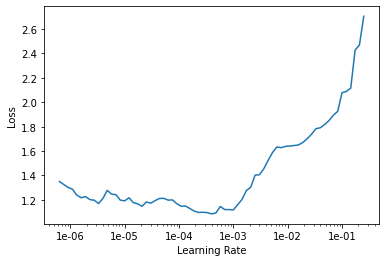

In [12]:
learn.lr_find()
learn.recorder.plot()

In [15]:
learn.fit_one_cycle(4, max_lr=slice(3e-4, 3e-3))


epoch,train_loss,valid_loss,accuracy,time
0,0.746010,14.596308,0.242424,00:05
1,2.035439,257.270966,0.242424,00:05
2,2.084306,14.529955,0.303030,00:05
3,1.932425,2.282345,0.424242,00:05


In [16]:
learn.save('stage-1')

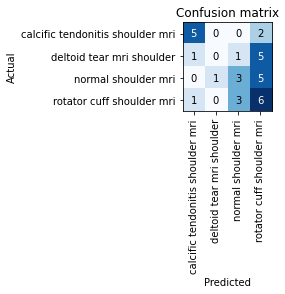

In [17]:
interpret = ClassificationInterpretation.from_learner(learn)
interpret.plot_confusion_matrix()

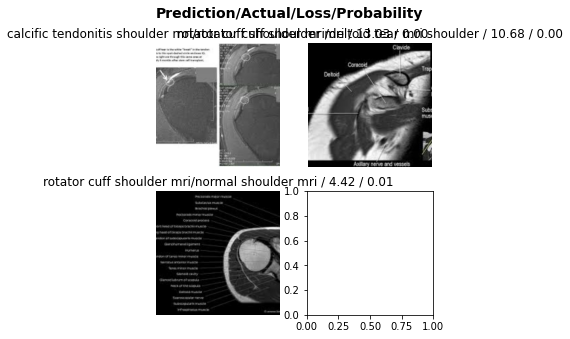

In [18]:
interpret.plot_top_losses(3, figsize=(5,5))

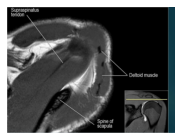

In [19]:
IMAGEPATH = '/content/shoulder.jpg'

image = open_image(IMAGEPATH)
image.show()

In [20]:
learn.predict(image)

(Category tensor(3), tensor(3), tensor([0.0858, 0.1330, 0.3080, 0.4733]))